# STOCK PRICE PREDICTION  

DESCRIPTION  :
    
    Predicting the stock prices for 11 Energy based companies.
    This dataset contains data for 4 years from 2010 -2024.
    Consists of the following columns:
        
        Open  - The opening price of the stock
        High  - The high price of that day 
        Low   - The low price of that day
        Close - The closed price of that day 
        Adjusted close  - The stocks closing price that has been amended to include any 
                          distributions/corporate actions that occurs before next days open
        Volume  - The amount of stocks traded during that day 
        

In [1]:
#pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

# importing stock data from Yahoo finance
import yfinance as yf  

import seaborn as sns
#import ta



from sklearn.model_selection import train_test_split

from scipy.stats import skew

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input



import warnings
warnings.filterwarnings('ignore')

Power:


In [2]:
tickers_S = ['TATAPOWER.NS', 'ADANIGREEN.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'GIPCL.NS', 'JSWENERGY.NS', 'NHPC.NS', 'NTPC.NS', 'NLCINDIA.NS', 'POWERGRID.NS', 'PTC.NS']

In [3]:
tickers_S = ['TATAPOWER.NS', 'ADANIGREEN.NS', 'ADANIPOWER.NS', 'ADANITRANS.NS', 'GIPCL.NS', 'JSWENERGY.NS', 'NHPC.NS', 'NTPC.NS', 'NLCINDIA.NS', 'POWERGRID.NS', 'PTC.NS']
data = pd.DataFrame()

for ticker in tickers_S:
    temp_df = yf.download(ticker, start='2010-01-01', end='2024-05-30',actions=True)
    temp_df['Company'] = ticker
    data = pd.concat([data, temp_df])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANITRANS.NS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
#importing our data to csv file

data.to_csv('Stock.csv')

# DATA PRE-PROCESSING

In [5]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,,
2010-01-04,133.751373,135.097580,133.577682,134.079483,109.100319,3172720.0,0.0,0.0,TATAPOWER.NS
2010-01-05,134.716400,137.997452,134.422058,136.033646,110.690422,4254349.0,0.0,0.0,TATAPOWER.NS
2010-01-06,136.067413,144.366562,136.067413,142.344849,115.825836,8747201.0,0.0,0.0,TATAPOWER.NS
2010-01-07,142.822540,144.945572,139.444977,142.933517,116.304848,5495560.0,0.0,0.0,TATAPOWER.NS
2010-01-08,143.305054,144.077057,141.355713,142.856308,116.242012,3916987.0,0.0,0.0,TATAPOWER.NS
2010-01-11,143.314697,146.460648,141.490814,142.822540,116.214531,4785645.0,0.0,0.0,TATAPOWER.NS
2010-01-12,145.659683,145.659683,140.902161,143.700699,116.929100,3978032.0,0.0,0.0,TATAPOWER.NS
2010-01-13,142.822540,144.636765,142.397934,143.773087,116.988022,1436523.0,0.0,0.0,TATAPOWER.NS
2010-01-14,144.270065,145.389481,139.671753,140.545105,114.361374,5188156.0,0.0,0.0,TATAPOWER.NS


we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [6]:
data.shape

(33423, 9)

From this we can conclude there are 32924 rows and 9 columns or features in our dataset

In [7]:
# check the datatype of index column which represents the date 

type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
#The data.info() method is used to display information about a Pandas DataFrame, including the 
# number of non-null values, the data type of each column, and the memory usage of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33423 entries, 2010-01-04 to 2024-05-27
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          33423 non-null  float64
 1   High          33423 non-null  float64
 2   Low           33423 non-null  float64
 3   Close         33423 non-null  float64
 4   Adj Close     33423 non-null  float64
 5   Volume        33423 non-null  float64
 6   Dividends     33423 non-null  float64
 7   Stock Splits  33423 non-null  float64
 8   Company       33423 non-null  object 
dtypes: float64(8), object(1)
memory usage: 2.5+ MB


In [9]:
 # Descriptive statistical measures of the features.

data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,33423.000000,33423.000000,33423.000000,33423.000000,33423.000000,3.342300e+04,33423.000000,33423.000000
mean,134.849928,137.207258,132.253509,134.590415,119.416956,6.351270e+06,0.009648,0.000415
std,245.849079,250.879496,239.626549,244.965411,247.617500,1.444766e+07,0.166954,0.056048
min,15.000000,15.200000,14.800000,15.050000,8.458600,0.000000e+00,0.000000,0.000000
25%,58.450001,59.450001,57.431263,58.349998,43.277485,7.122700e+05,0.000000,0.000000
50%,81.750000,83.000000,80.449997,81.599998,64.990707,2.604849e+06,0.000000,0.000000
75%,119.757454,121.449997,117.953136,119.550003,93.233585,6.871064e+06,0.000000,0.000000
max,3035.000000,3050.000000,2850.000000,2970.500000,2970.500000,6.247629e+08,7.800000,10.000000


In [10]:
# Checking for null values 

data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

There are no null values in our data

# EDA- Exploratory Data Analysis

EDA- Exploratory Data Analysis

EDA also known as Exploratory Data Analysis is a technique that is used to analyze the data through visualization
and manipulation.

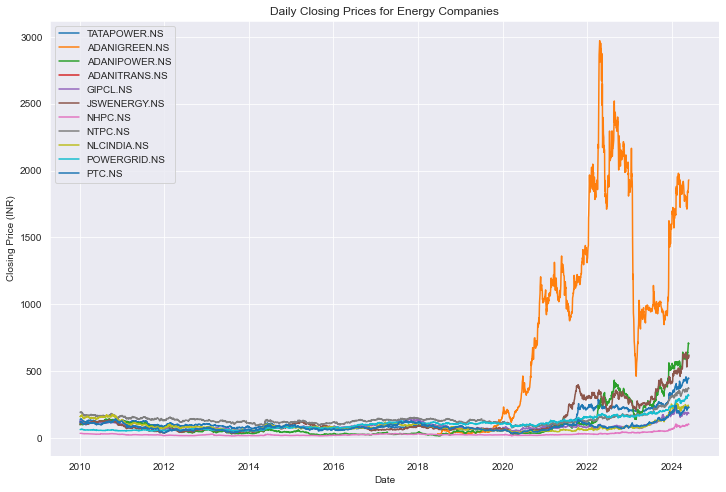

In [11]:
# Line plot of daily closing prices for each company
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
for i in tickers_S:
    temp_df = data[data['Company'] == i]
    plt.plot(temp_df.index, temp_df['Close'], label=i)
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.title("Daily Closing Prices for Energy Companies")
plt.legend()
plt.show()

It is evident from the graph that out of 11 companies 2 companies "Adani Trans" and "Adani Greens" have high "Closing price"over 
the last 2 years. 

And also "Adani Trans" have high closing price in 2023 compared to "Adani Trans" .



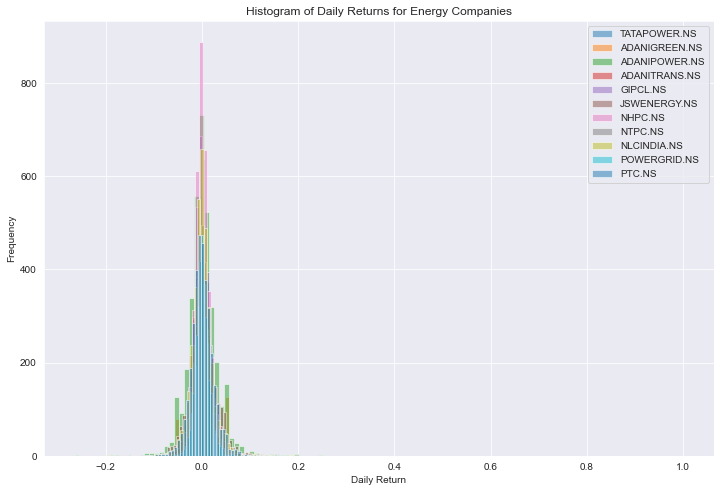

In [12]:
# Histogram of daily returns for each company
plt.figure(figsize=(12, 8))
for i in tickers_S:    # iterate over each ticker symbol in the tickers_S list.
    temp_df = data[data['Company'] == i]   #  For each ticker, we create a temporary DataFrame (temp_df) by filtering the data DataFrame to include only rows where the 'Company' column matches the ticker symbol.
    temp_df['Return'] = temp_df['Close'].pct_change() # calculate the daily return for each company by applying the pct_change() method to the 'Close' column of temp_df
    plt.hist(temp_df['Return'], bins=50, alpha=0.5, label=i)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Histogram of Daily Returns for Energy Companies")
plt.legend()
plt.show()

From the histogram, we can observe that the distribution of daily returns for each company is different. Some companies have a relatively stable return distribution with a low variance, while others have a more volatile return distribution with a higher variance. We can also observe that some companies have a higher frequency of positive daily returns,
while others have a higher frequency of negative daily returns.

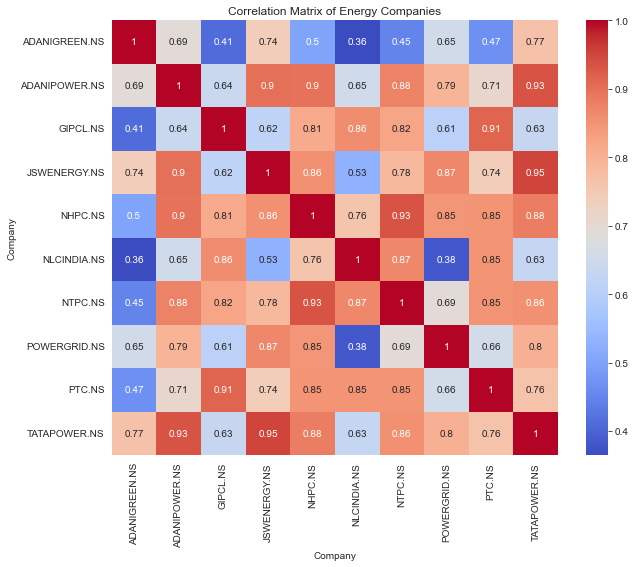

In [13]:
# Heat map of correlation matrix
corr = data.pivot_table(values='Close', index=data.index, columns='Company').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Energy Companies")
plt.show()

There is a positive correlation between TATAPOWER and NTPC, This indicates that the daily closing prices of these two companies tend to move in the same direction.

There is also a positive correlation between NHPC and NTPC, This suggests that the daily closing prices of these two companies are also somewhat positively correlated.

There are most of the off-diagonal cells are shaded in various shades of yellow, indicating moderate positive correlations between the different energy companies. This suggests that the daily closing prices of these companies are generally moving in the same direction, although not perfectly correlated.

No strong negative correlations between any of the pairs of companies.

Most of the off-diagonal cells are shaded in various shades of yellow, indicating moderate positive correlations between the different energy companies. 

This suggests that the daily closing prices of these companies are generally moving in the same direction, although not perfectly correlated.

In [14]:
# Calculate summary statistics of the 'Close' column for each company in the dataset
print(data.groupby('Company')['Close'].describe())


                count        mean         std        min         25%  \
Company                                                                
ADANIGREEN.NS  1464.0  935.580533  761.900686  25.200001  132.087494   
ADANIPOWER.NS  3551.0  102.828907  119.861530  15.450000   35.225000   
GIPCL.NS       3551.0   89.345945   26.447197  45.849998   72.199997   
JSWENERGY.NS   3551.0  125.940144  114.945767  35.000000   63.000000   
NHPC.NS        3551.0   28.101436   12.910661  15.050000   20.650000   
NLCINDIA.NS    3551.0   87.513433   37.787940  39.299999   64.849998   
NTPC.NS        3551.0  140.960070   44.497340  76.400002  117.349998   
POWERGRID.NS   3551.0  104.227232   48.773742  51.384388   63.028141   
PTC.NS         3551.0   84.807097   31.912213  32.799999   62.900002   
TATAPOWER.NS   3551.0  117.358687   73.886018  27.299999   74.349998   

                      50%          75%          max  
Company                                              
ADANIGREEN.NS  958.425018  

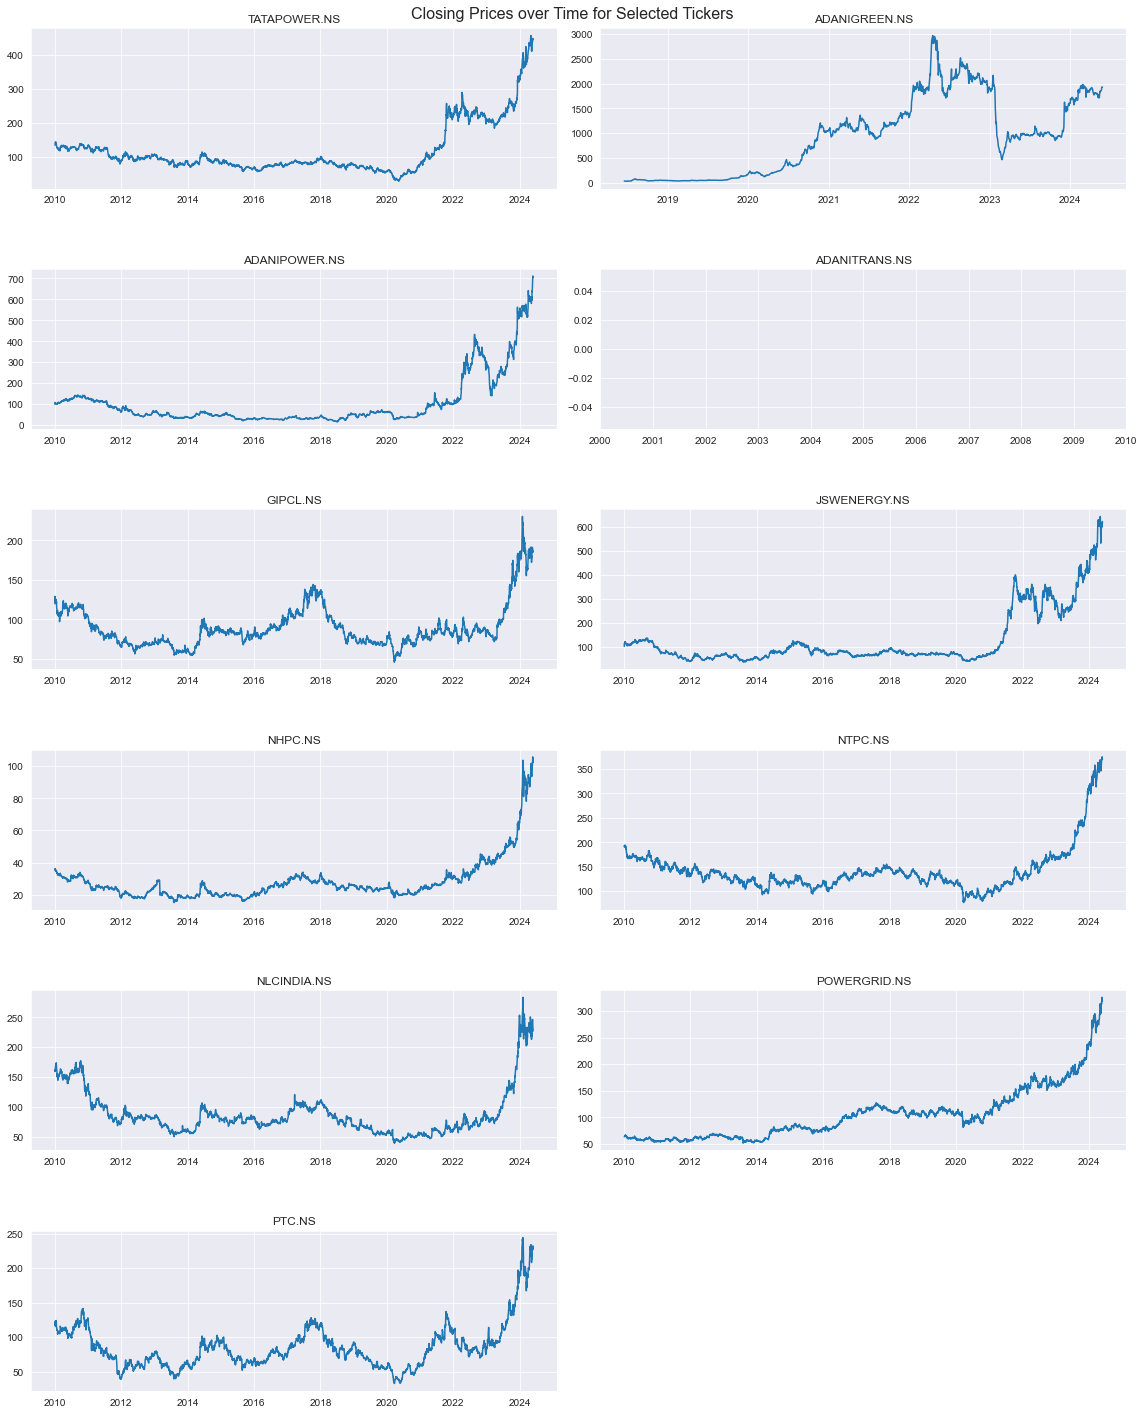

In [15]:
# Visualize trends in data over time
# Set up the subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 20))

# Plot each line plot on a separate subplot
for i, ax in enumerate(axs.flat):
    if i < len(tickers_S):
        ticker_data = data[data['Company'] == tickers_S[i]]
        ax.plot(ticker_data.index, ticker_data['Close'])
        ax.set_title(tickers_S[i])
    else:
        ax.axis('off')  # Hide empty subplots

# Add common labels and adjust spacing
fig.suptitle('Closing Prices over Time for Selected Tickers', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()





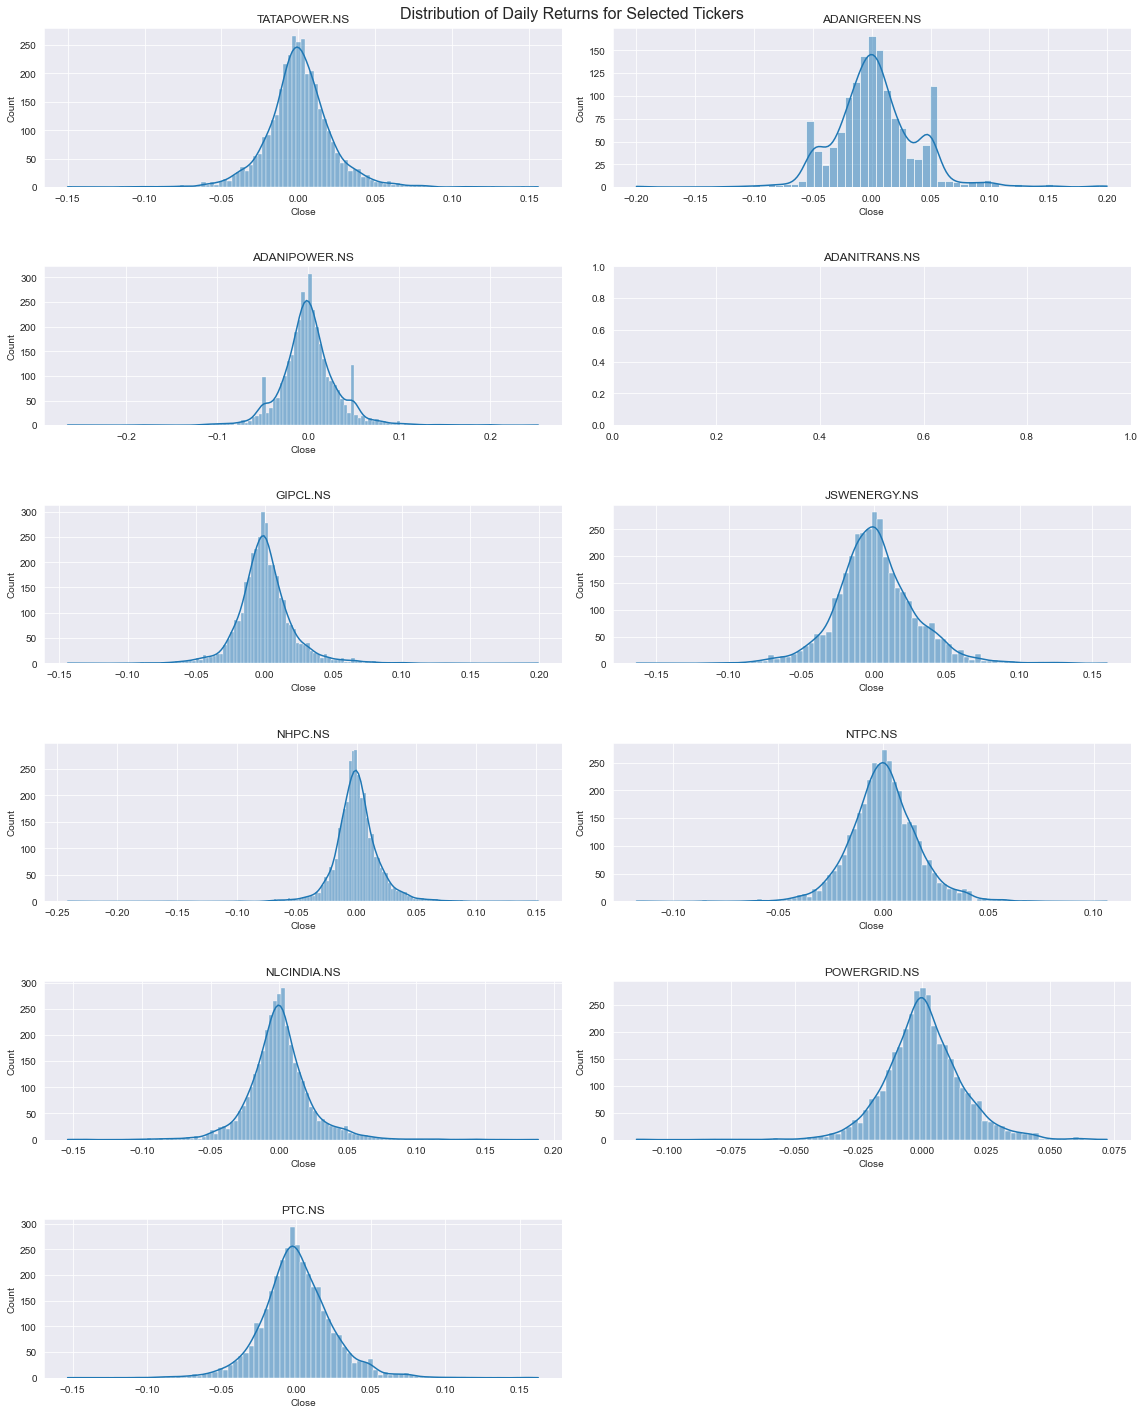

In [16]:

# Visualize distribution of daily returns

# Create the grid of subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 20))

# Loop over the subplots and plot each histogram
for i, ax in enumerate(axs.flat):
    if i < len(tickers_S):
        ticker_data = data[data['Company'] == tickers_S[i]]
        sns.histplot(ticker_data['Close'].pct_change().dropna(), kde=True, ax=ax)
        ax.set_title(tickers_S[i])
    else:
        ax.axis('off')

# Add common labels and adjust spacing
fig.suptitle('Distribution of Daily Returns for Selected Tickers', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()





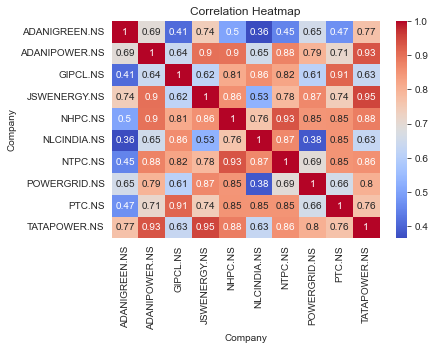

In [17]:

# Calculate correlation matrix and plot heatmap
corr_matrix = data.pivot_table(values='Close', index='Date', columns='Company').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering:

# Moving Average:

In [18]:
# Reset the index
data = data.reset_index()

# Calculate moving averages for each stock
data['20-day MA'] = data.groupby('Company')['Close'].rolling(window=20).mean().reset_index(0, drop=True)
data['50-day MA'] = data.groupby('Company')['Close'].rolling(window=50).mean().reset_index(0, drop=True)
data['200-day MA'] = data.groupby('Company')['Close'].rolling(window=200).mean().reset_index(0, drop=True)

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,20-day MA,50-day MA,200-day MA
33418,2024-05-21,227.350006,232.100006,225.050003,228.300003,228.300003,2152009.0,0.0,0.0,PTC.NS,223.562501,204.748001,173.65725
33419,2024-05-22,230.000000,232.300003,224.350006,228.100006,228.100006,1316152.0,0.0,0.0,PTC.NS,223.690001,205.311001,174.23800
33420,2024-05-23,229.000000,231.050003,226.149994,227.000000,227.000000,1493928.0,0.0,0.0,PTC.NS,223.462501,205.939001,174.80975
33421,2024-05-24,226.600006,236.500000,226.000000,232.250000,232.250000,2094631.0,0.0,0.0,PTC.NS,223.557500,206.741001,175.40575
33422,2024-05-27,232.250000,234.649994,227.699997,228.800003,228.800003,1224172.0,0.0,0.0,PTC.NS,223.547501,207.430001,175.98225


In [19]:
data.set_index('Date',inplace=True)

In [20]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,20-day MA,50-day MA,200-day MA
Date,,,,,,,,,,,,
2010-01-04,133.751373,135.097580,133.577682,134.079483,109.100319,3172720.0,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-05,134.716400,137.997452,134.422058,136.033646,110.690422,4254349.0,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-06,136.067413,144.366562,136.067413,142.344849,115.825836,8747201.0,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-07,142.822540,144.945572,139.444977,142.933517,116.304848,5495560.0,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN
2010-01-08,143.305054,144.077057,141.355713,142.856308,116.242012,3916987.0,0.0,0.0,TATAPOWER.NS,NaN,NaN,NaN


In [21]:
data.to_csv('stock.csv')

In [22]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company', '20-day MA', '50-day MA', '200-day MA'],
      dtype='object')

# Train Test Split

In [23]:
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)
#  A boolean parameter indicating whether or not to shuffle the data before splitting.
# shuffle=False, which means the data will not be shuffled, and the splitting will be performed in a sequential manner.

In [26]:
len(train_data)

23396

In [27]:
len(test_data)

10027

In [28]:
# Select the data for a specific company
company_data = data[data['Company'] == 'NTPC.NS'].copy()

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(company_data['Close'].values.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for input and output
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/10
89/89 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 2/10
89/89 [==============================] - 0s 5ms/step - loss: 1.5352e-04
Epoch 3/10
89/89 [==============================] - 0s 5ms/step - loss: 1.3977e-04
Epoch 4/10
89/89 [==============================] - 0s 5ms/step - loss: 1.3573e-04
Epoch 5/10
89/89 [==============================] - 0s 5ms/step - loss: 1.3376e-04
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 1.2584e-04
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 1.2985e-04
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 1.3329e-04
Epoch 9/10
89/89 [==============================] - 0s 5ms/step - loss: 1.0901e-04
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 4.5605e-04
Test Loss: 0.00045604907791130245


In [29]:
# Use the trained model to make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - actual_values)**2))
print('Root Mean Squared Error (RMSE):', rmse)

22/22 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 6.3756267579331


22/22 [==============================] - 0s 2ms/step


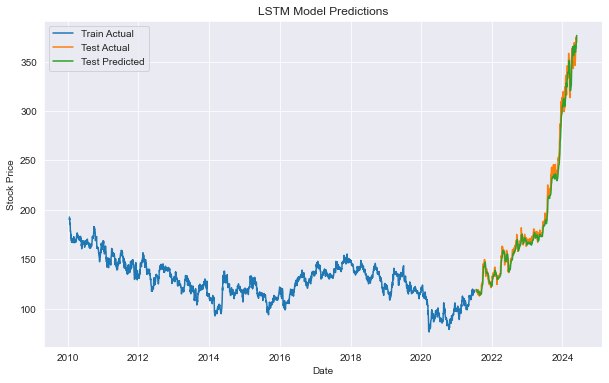

In [30]:
# Use the trained model to make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
train_actual_values = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
test_actual_values = scaler.inverse_transform(y_test)

# Get the dates corresponding to the train and test data
train_dates = company_data.index[window_size:train_size]
test_dates = company_data.index[train_size+window_size:]

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_actual_values, label='Train Actual')
plt.plot(test_dates, test_actual_values, label='Test Actual')
plt.plot(test_dates, test_predictions, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()